<a href="https://colab.research.google.com/github/JavierFuenza/PrediccionLigaChilena/blob/main/Prediccion_partidos_liga_chilena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estudio de datos y entrenamiento de modelo para predecir partidos de la liga chilena**

Javier Fuenzalida Martinez 2024

# **Buisness Understanding**


  El objetivo de este cuaderno es intentar encontrar una forma de predecir partidos de futbol con algoritmos de ML


# **Data Understanding**


Los datos que ocupare fueron sacados de [Fbref](https://fbref.com/ ), estos son todos los partidos de la primera division desde el 2021 hasta el 2023

## Importacion de librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Creacion de DataFrame

In [ ]:
df = pd.read_csv('datos.csv')

In [ ]:
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,notes,sh,sot,dist,pk,pkatt,season,team,xg,xga
0,0,2023-01-23,19:00,Primera División,Matchweek 1,Mon,Away,W,3,1,...,NaN,10.0,5.0,NaN,0,0,2023,Huachipato,NaN,NaN
1,1,2023-01-29,12:00,Primera División,Matchweek 2,Sun,Home,W,2,1,...,NaN,16.0,7.0,NaN,0,0,2023,Huachipato,NaN,NaN
2,2,2023-02-06,20:00,Primera División,Matchweek 3,Mon,Away,W,1,0,...,NaN,10.0,3.0,NaN,0,0,2023,Huachipato,NaN,NaN
3,3,2023-02-18,11:00,Primera División,Matchweek 5,Sat,Away,W,2,1,...,NaN,12.0,3.0,NaN,0,0,2023,Huachipato,NaN,NaN
4,4,2023-03-03,18:00,Primera División,Matchweek 7,Fri,Away,L,1,2,...,NaN,10.0,2.0,NaN,0,0,2023,Huachipato,NaN,NaN


In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1502 non-null   object 
 1   time          1502 non-null   object 
 2   comp          1502 non-null   object 
 3   round         1502 non-null   object 
 4   day           1502 non-null   object 
 5   venue         1502 non-null   object 
 6   result        1502 non-null   object 
 7   gf            1502 non-null   int64  
 8   ga            1502 non-null   int64  
 9   opponent      1502 non-null   object 
 10  poss          1496 non-null   float64
 11  attendance    814 non-null    float64
 12  captain       1502 non-null   object 
 13  formation     1500 non-null   object 
 14  referee       1502 non-null   object 
 15  match report  1502 non-null   object 
 16  notes         2 non-null      object 
 17  sh            1502 non-null   float64
 18  sot           1502 non-null 

In [ ]:
df.isna().sum()

,0
date,0
time,0
comp,0
round,0
day,0
venue,0
result,0
gf,0
ga,0
opponent,0


En el siguiente codigo divido el dataframe en datos categoricos y numericos

In [ ]:
df_num = df.select_dtypes(include = 'number')
df_cat = df.select_dtypes(include = 'object')

In [ ]:
df_num.head()

,gf,ga,poss,attendance,sh,sot,dist,pk,pkatt,season,xg,xga
0,3,1,57.0,14654.0,10.0,5.0,NaN,0,0,2023,NaN,NaN
1,2,1,63.0,1863.0,16.0,7.0,NaN,0,0,2023,NaN,NaN
2,1,0,52.0,6357.0,10.0,3.0,NaN,0,0,2023,NaN,NaN
3,2,1,50.0,6248.0,12.0,3.0,NaN,0,0,2023,NaN,NaN
4,1,2,69.0,975.0,10.0,2.0,NaN,0,0,2023,NaN,NaN


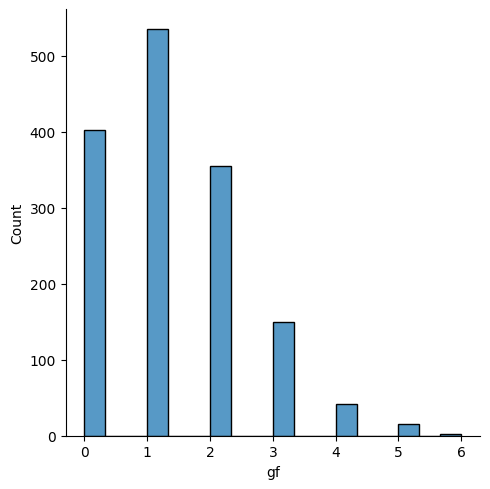

In [ ]:
sns.displot(df_num['gf'])

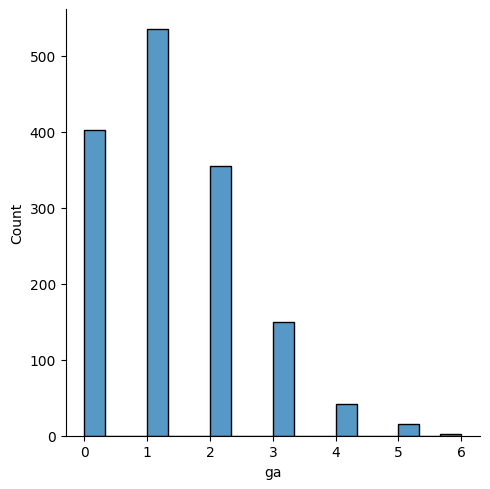

In [ ]:
sns.displot(df_num['ga'])

En los dos graficos se observa una distribucion practicamente igual, esto tiene sentido debido a que la cantidad de goles son los mismos, la diferencia es si son en contra a favor. Respecto a la distribucion de los datos se observa que estos se concentran en el 1  y que a medida que avanza la cantidad de goles la frecuencia disminuye, para entender mejor esto veremos un diagrama de caja.

<Axes: ylabel='gf'>

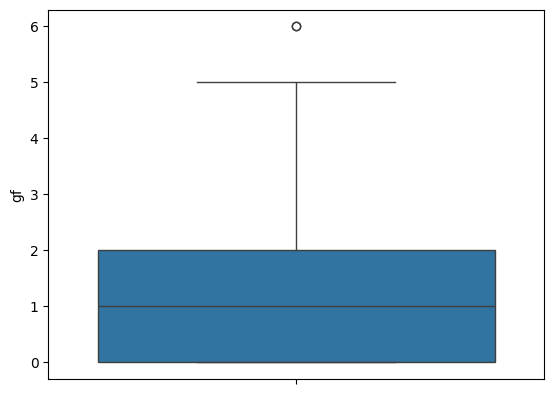

In [ ]:
sns.boxplot(df_num['gf'])

<Axes: ylabel='ga'>

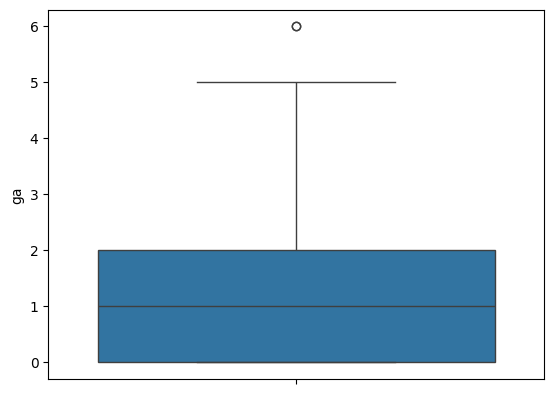

In [ ]:
sns.boxplot(df_num['ga'])

Se observa de nuevo que tienen la misma distribucion y vemos que los 6 goles a favor o en contra son un outlier

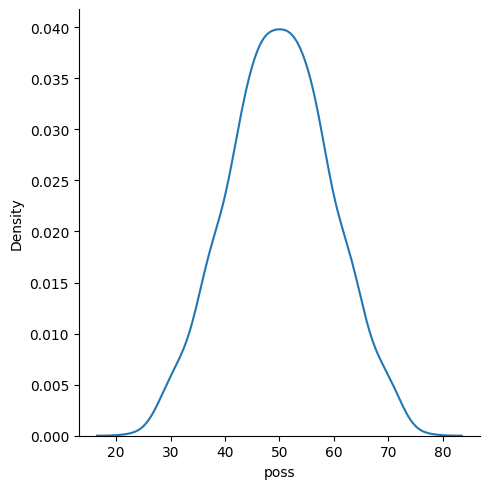

In [ ]:
sns.displot(df_num['poss'], kind="kde")

Aca se observa que la posesion es una distribucion normal practicamente perfecta

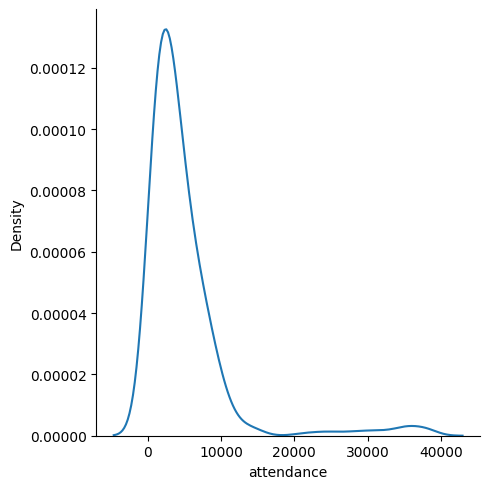

In [ ]:
sns.displot(df_num['attendance'], kind="kde")

Se observa que la variable tiene una distribucion normal hacia la izquierda, ademas de algunos outliers

<Axes: ylabel='attendance'>

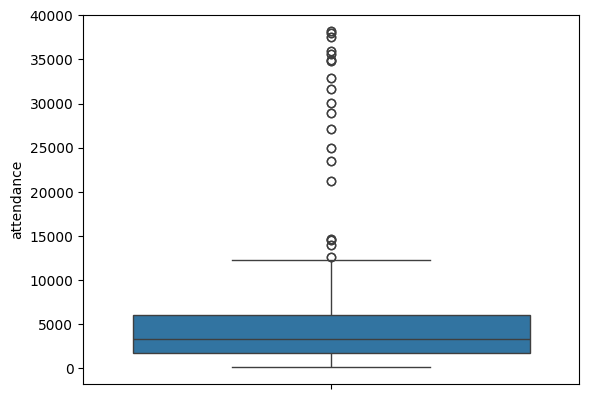

In [ ]:
sns.boxplot(df_num['attendance'])

Aca se observa la gran cantidad de outliers que tiene la variable

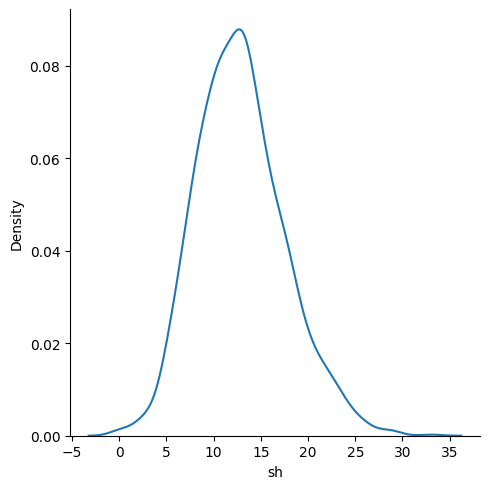

In [ ]:
sns.displot(df_num['sh'], kind="kde")

Aca se observa nuevamente una distribucion normal perfecta en este caso en los disparos

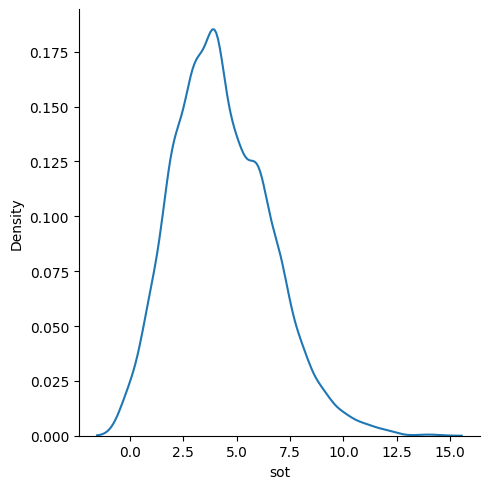

In [ ]:
sns.displot(df_num['sot'], kind="kde")

aca se observa que la variable disparos al arco, tiene una distribucion casi normal, para entener esto vamos a ver mas graficos

<Axes: ylabel='sot'>

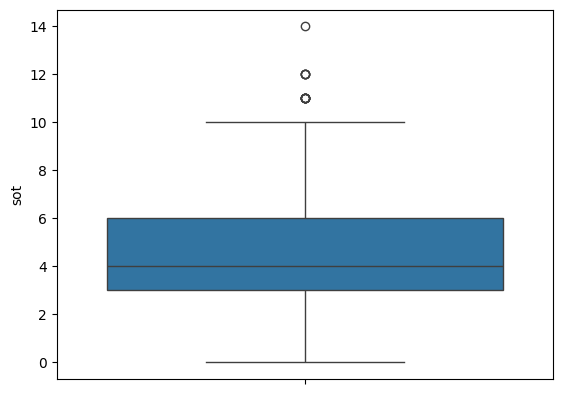

In [ ]:
sns.boxplot(df_num['sot'])

Aca podemos observar los outliers y que el tercer cuartil es el que tiene la densidad mas alta.

In [ ]:
df_cat.head()

,date,time,comp,round,day,venue,result,opponent,captain,formation,referee,match report,notes,team
0,2023-01-23,19:00,Primera División,Matchweek 1,Mon,Away,W,Univ Chile,Claudio Sepúlveda,4-4-2◆,Héctor Jona,Match Report,NaN,Huachipato
1,2023-01-29,12:00,Primera División,Matchweek 2,Sun,Home,W,Cobresal,Claudio Sepúlveda,4-4-2◆,Piero Maza,Match Report,NaN,Huachipato
2,2023-02-06,20:00,Primera División,Matchweek 3,Mon,Away,W,O'Higgins,Claudio Sepúlveda,4-3-1-2,Fernando Vejar,Match Report,NaN,Huachipato
3,2023-02-18,11:00,Primera División,Matchweek 5,Sat,Away,W,Coquimbo Unido,Claudio Sepúlveda,4-3-1-2,Miguel Araos,Match Report,NaN,Huachipato
4,2023-03-03,18:00,Primera División,Matchweek 7,Fri,Away,L,Palestino,Claudio Sepúlveda,4-3-1-2,Victor Abarzúa,Match Report,NaN,Huachipato


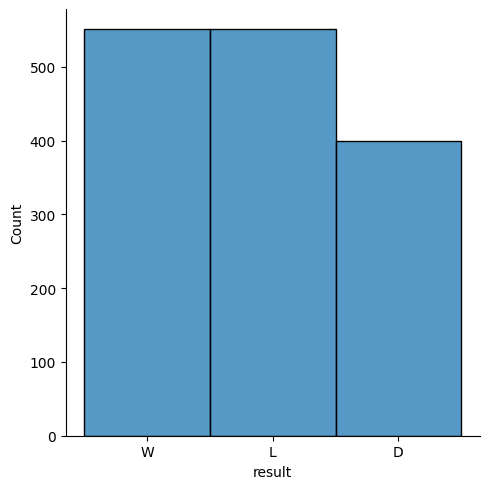

In [ ]:
sns.displot(df_cat['result'])

Aca observamos que la variable que menos frecuencia tiene es el empate

<Axes: xlabel='result', ylabel='poss'>

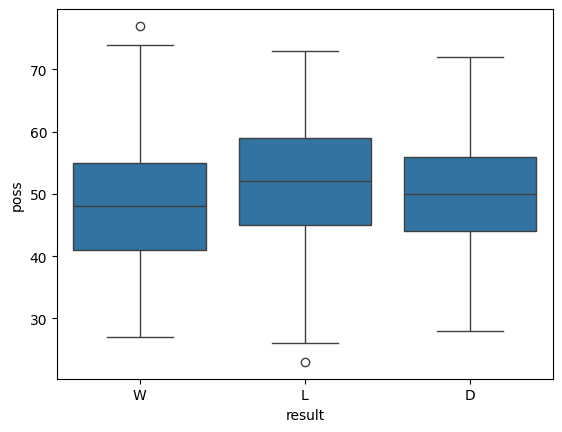

In [ ]:
sns.boxplot(x=df_cat['result'], y=df_num['poss'])

Aca se observa que la mediana de los equipos que ganan esta bajo el 50% de posesion, a diferencia de los que pierden, los cuales tienen una posesion mas alta. Los equipos que empatan tienen la media muy cercana a 50%.

Esto nos demuestra que en el futbol chileno tener la posesion es generalmente perjudicial, probablemente.

## Analisis de correlacion

Para hacer la matriz de correlacion necesitamos eliminar los datos nulos

In [ ]:
df_corr = df.drop(['xg','xga','date','notes','dist'], axis=1)

In [ ]:
df_corr = df_corr.interpolate(method='pad')

<ipython-input-23-e16d2ecbfbe7>:1: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_corr = df_corr.interpolate(method='pad')


In [ ]:
df_corr.head()

,time,comp,round,day,venue,result,gf,ga,opponent,poss,...,captain,formation,referee,match report,sh,sot,pk,pkatt,season,team
0,19:00,Primera División,Matchweek 1,Mon,Away,W,3,1,Univ Chile,57.0,...,Claudio Sepúlveda,4-4-2◆,Héctor Jona,Match Report,10.0,5.0,0,0,2023,Huachipato
1,12:00,Primera División,Matchweek 2,Sun,Home,W,2,1,Cobresal,63.0,...,Claudio Sepúlveda,4-4-2◆,Piero Maza,Match Report,16.0,7.0,0,0,2023,Huachipato
2,20:00,Primera División,Matchweek 3,Mon,Away,W,1,0,O'Higgins,52.0,...,Claudio Sepúlveda,4-3-1-2,Fernando Vejar,Match Report,10.0,3.0,0,0,2023,Huachipato
3,11:00,Primera División,Matchweek 5,Sat,Away,W,2,1,Coquimbo Unido,50.0,...,Claudio Sepúlveda,4-3-1-2,Miguel Araos,Match Report,12.0,3.0,0,0,2023,Huachipato
4,18:00,Primera División,Matchweek 7,Fri,Away,L,1,2,Palestino,69.0,...,Claudio Sepúlveda,4-3-1-2,Victor Abarzúa,Match Report,10.0,2.0,0,0,2023,Huachipato


In [ ]:
df_corr.isna().sum()

,0
time,0
comp,0
round,0
day,0
venue,0
result,0
gf,0
ga,0
opponent,0
poss,0


Ahora que el dataframe no tiene Nan, podemos hacer la matriz

### Matriz de correlacion

<Axes: >

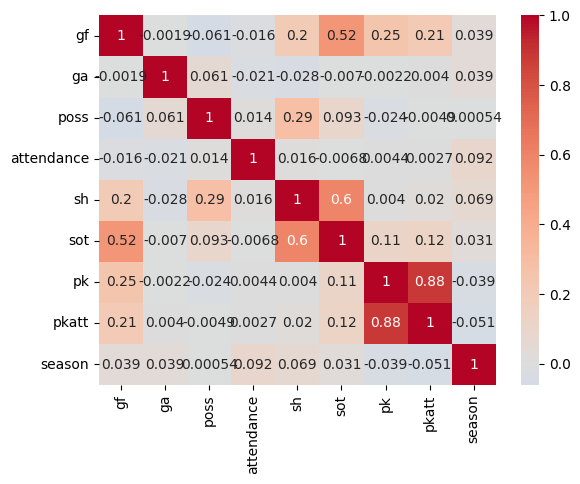

In [ ]:
corr = df_corr.corr(numeric_only='true')

sns.heatmap(corr,annot=True, cmap="coolwarm", center=0)

Vemos que en la correlacion no se encuentra la variable que buscamos predecir (no muestra ninguna variable categorica). Asi que vamos a intentar ccon dos metodos para ver la correlacion de la variable Result con las variables numericas.

### Transformacion variables categoricas a numericas

In [ ]:
df_cat.sample(3)

,date,time,comp,round,day,venue,result,opponent,captain,formation,referee,match report,notes,team
204,2023-10-01,15:00,Primera División,Matchweek 25,Sun,Away,L,Colo-Colo,Fernando Zampedri,4-3-3,Felipe González Alveal,Match Report,NaN,Univ Catolica
519,2022-04-18,18:00,Primera División,Matchweek 10,Mon,Home,W,CD Everton,Federico Mateos,4-4-2◆,Héctor Jona,Match Report,NaN,Nublense
779,2022-02-05,18:00,Primera División,Matchweek 1,Sat,Home,D,Palestino,Felipe Méndez,4-3-3,Claudio Cevasco,Match Report,NaN,Union Espanola


Podemos observar que la columna comp y match report, siempre va a ser la misma, por lo que no tiene relevancia en el analisis, ademas la columna date, day y notes tampoco aportan valor. Tamben por un tema de recursos, evitaremos transformar los datos en: captain y referee. Ademas la columna round, la transformare eliminando la palabra matchweek, ya que de esa forma quedara solo el numero de la fecha.

#### Transformacion de round

In [ ]:
df_cat2 = df_cat
df_cat2['round'] = df_cat['round'].str.replace('Matchweek ', '')

In [ ]:
df_cat2.head(3)

,date,time,comp,round,day,venue,result,opponent,captain,formation,referee,match report,notes,team
0,2023-01-23,19:00,Primera División,1,Mon,Away,W,Univ Chile,Claudio Sepúlveda,4-4-2◆,Héctor Jona,Match Report,NaN,Huachipato
1,2023-01-29,12:00,Primera División,2,Sun,Home,W,Cobresal,Claudio Sepúlveda,4-4-2◆,Piero Maza,Match Report,NaN,Huachipato
2,2023-02-06,20:00,Primera División,3,Mon,Away,W,O'Higgins,Claudio Sepúlveda,4-3-1-2,Fernando Vejar,Match Report,NaN,Huachipato


In [ ]:
df_cat2['round'] = df_cat2['round'].astype(int)

#### Label encoding para variables binarias


Para transformar venue a numerica, utilizare Label encoding.

In [ ]:
le = LabelEncoder()
le.fit(df_cat2['venue'])
df_cat2['venue'] = le.transform(df_cat2['venue'])

In [ ]:
df_cat2.head(3)

,date,time,comp,round,day,venue,result,opponent,captain,formation,referee,match report,notes,team
0,2023-01-23,19:00,Primera División,1,Mon,0,W,Univ Chile,Claudio Sepúlveda,4-4-2◆,Héctor Jona,Match Report,NaN,Huachipato
1,2023-01-29,12:00,Primera División,2,Sun,1,W,Cobresal,Claudio Sepúlveda,4-4-2◆,Piero Maza,Match Report,NaN,Huachipato
2,2023-02-06,20:00,Primera División,3,Mon,0,W,O'Higgins,Claudio Sepúlveda,4-3-1-2,Fernando Vejar,Match Report,NaN,Huachipato


#### One Hot Encoder para variables no binarias

In [ ]:
ohe = OneHotEncoder(sparse_output=False, dtype=np.int64)
ohe.fit(df_cat2[['day','result','opponent','team','formation']])

OneHotEncoder(dtype=<class 'numpy.int64'>, sparse_output=False)

In [ ]:
ohe.categories_

[array(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype=object),
 array(['D', 'L', 'W'], dtype=object),
 array(['Antofagasta', 'Audax Italiano', 'CD Everton', 'Cobresal',
        'Colo-Colo', 'Coquimbo Unido', 'Curico Unido', 'Deportes Copiapó',
        'Deportes Magallanes', 'Deportes Melipilla', 'Huachipato',
        'La Calera', 'La Serena', "O'Higgins", 'Palestino',
        'Univ Católica', 'Univ Chile', 'Unión Española', 'Wanderers',
        'Ñublense'], dtype=object),
 array(['Antofagasta', 'Audax Italiano', 'CD Everton', 'Cobresal',
        'Colo Colo', 'Coquimbo Unido', 'Curico Unido', 'Deportes Copiapo',
        'Deportes Magallanes', 'Deportes Melipilla', 'Huachipato',
        'La Calera', 'La Serena', 'Nublense', 'OHiggins', 'Palestino',
        'Santiago Wande', 'Union Espanola', 'Univ Catolica', 'Univ Chile'],
       dtype=object),
 array(['3-1-4-2', '3-4-1-2', '3-4-3', '3-5-1-1', '3-5-2', '4-1-3-2',
        '4-1-4-1', '4-2-2-2', '4-2-3-1', '4-3-1-2', '4-3-3', '4-4

In [ ]:
transformed = pd.DataFrame(ohe.transform(df_cat2[['day','result','opponent','team','formation']]), columns=ohe.get_feature_names_out())
df_cat3 = pd.concat([df_cat2, transformed], axis=1)
df_cat3 = df_cat3.drop(['day','result','opponent','team','formation'], axis=1)
df_cat3.head(10)

,date,time,comp,round,venue,captain,referee,match report,notes,day_Fri,...,formation_4-2-3-1,formation_4-3-1-2,formation_4-3-3,formation_4-4-1-1,formation_4-4-2,formation_4-4-2◆,formation_4-5-1,formation_5-3-2,formation_5-4-1,formation_nan
0,2023-01-23,19:00,Primera División,1,0,Claudio Sepúlveda,Héctor Jona,Match Report,NaN,0,...,0,0,0,0,0,1,0,0,0,0
1,2023-01-29,12:00,Primera División,2,1,Claudio Sepúlveda,Piero Maza,Match Report,NaN,0,...,0,0,0,0,0,1,0,0,0,0
2,2023-02-06,20:00,Primera División,3,0,Claudio Sepúlveda,Fernando Vejar,Match Report,NaN,0,...,0,1,0,0,0,0,0,0,0,0
3,2023-02-18,11:00,Primera División,5,0,Claudio Sepúlveda,Miguel Araos,Match Report,NaN,0,...,0,1,0,0,0,0,0,0,0,0
4,2023-03-03,18:00,Primera División,7,0,Claudio Sepúlveda,Victor Abarzúa,Match Report,NaN,1,...,0,1,0,0,0,0,0,0,0,0
5,2023-03-11,20:30,Primera División,8,0,Gabriel Castellón,Rodrigo Carvajal,Match Report,NaN,0,...,0,0,1,0,0,0,0,0,0,0
6,2023-03-18,12:00,Primera División,9,1,Claudio Sepúlveda,Héctor Jona,Match Report,NaN,0,...,0,0,1,0,0,0,0,0,0,0
7,2023-04-01,12:00,Primera División,4,1,Claudio Sepúlveda,Diego Flores,Match Report,NaN,0,...,0,0,1,0,0,0,0,0,0,0
8,2023-04-05,19:00,Primera División,6,1,Gabriel Castellón,Cristián Garay,Match Report,NaN,0,...,0,0,1,0,0,0,0,0,0,0
9,2023-04-15,20:30,Primera División,10,0,Claudio Sepúlveda,Fernando Vejar,Match Report,NaN,0,...,0,0,1,0,0,0,0,0,0,0


### Matriz de correlacion con variables categoricas

Para hacer esta matriz, vamos a hacer un nuevo data frame que contenga los nuevos datos categoricos

In [ ]:
df_cat4 = df_cat3.drop(['captain','referee','match report','notes','comp'], axis=1)
df_matriz = pd.concat([df_corr, df_cat4], axis=1)
df_matriz.tail(3)

,time,comp,round,day,venue,result,gf,ga,opponent,poss,...,formation_4-2-3-1,formation_4-3-1-2,formation_4-3-3,formation_4-4-1-1,formation_4-4-2,formation_4-4-2◆,formation_4-5-1,formation_5-3-2,formation_5-4-1,formation_nan
1499,17:30,Primera División,Matchweek 32,Mon,Away,L,0,2,Huachipato,31.0,...,0,0,0,0,0,0,1,0,0,0
1500,12:00,Primera División,Matchweek 33,Sun,Home,D,2,2,Audax Italiano,54.0,...,1,0,0,0,0,0,0,0,0,0
1501,18:00,Primera División,Matchweek 34,Sat,Away,D,0,0,La Serena,39.0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

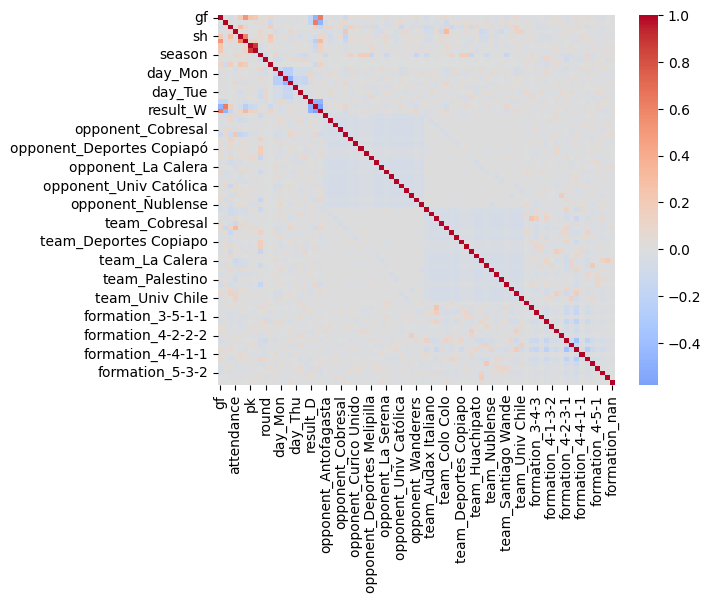

In [ ]:
corr2 = df_matriz.corr(numeric_only='true')
sns.heatmap(corr2, cmap="coolwarm", center=0)

Se puede observar que la matriz de correlacion es demasiado grande,debido a esto, visualizare solo la matriz de las variables respecto a result

In [ ]:
corr3 = corr2
for i in corr3:
  if i not in ['result_W', 'result_D', 'result_L']:
    corr3 = corr3.drop(i, axis=0)
corr3.head(10)

,gf,ga,poss,attendance,sh,sot,pk,pkatt,season,round,...,formation_4-2-3-1,formation_4-3-1-2,formation_4-3-3,formation_4-4-1-1,formation_4-4-2,formation_4-4-2◆,formation_4-5-1,formation_5-3-2,formation_5-4-1,formation_nan
result_D,-0.168147,-0.168147,0.000197,0.003760,-0.026505,-0.068961,-0.008566,-0.013006,-0.020012,-0.030594,...,0.016641,-0.025853,0.013145,-0.001907,-0.036629,-0.021772,-0.034083,0.039457,0.043628,-0.021999
result_L,-0.473029,0.627250,0.152376,-0.006012,-0.085730,-0.252952,-0.139805,-0.108158,0.009177,0.014030,...,0.020667,-0.007585,-0.029491,0.014277,-0.009632,-0.001918,0.064236,0.007439,-0.020007,0.010089
result_W,0.627250,-0.473029,-0.152557,0.002564,0.110040,0.316201,0.147662,0.120087,0.009177,0.014030,...,-0.035930,0.031297,0.017436,-0.012528,0.043228,0.021886,-0.032976,-0.043629,-0.020007,0.010089


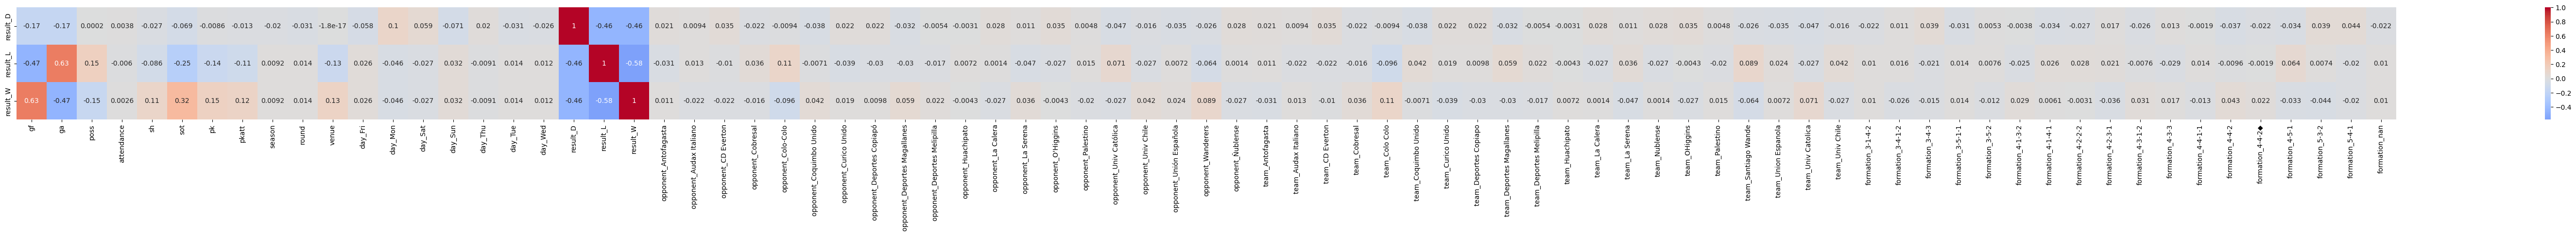

In [ ]:
plt.figure(figsize=(79, 3))
sns.heatmap(corr3,annot=True, cmap="coolwarm", center=0)
plt.show()

Ahora si se puede observar de una mejor forma la correlacion entre las variables respecto a la variable objetivo. a pesar de que no hay grandes correlaciones, se pueden hacer observaciones interesantes al respecto.

La mas clara es la relacion entre goles a favor y ganar el partido, o que los goles en contra estan relacionados con perder el partido.
Tambien se observa como la posesion tiene una relacion inversa con ganar el partido, algo que ya habia destacado en el grafico de caja, comparando result y posession.

Otro dato importante que se observa es que los disparos al arco tambien tienen correlacion positiva.

Otra observacion que se puede hacer al respecto es que los goles tanto a favor como en contra tienen una relacion negativa con el empate, esto debe ser porque la mayoria de los empates son resultados 0-0.

# **Data Preparation**

## Creacion del dataframe final

#### Limpieza de datos

In [ ]:
df.head(3)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,notes,sh,sot,dist,pk,pkatt,season,team,xg,xga
0,2023-01-23,19:00,Primera División,Matchweek 1,Mon,Away,W,3,1,Univ Chile,...,NaN,10.0,5.0,NaN,0,0,2023,Huachipato,NaN,NaN
1,2023-01-29,12:00,Primera División,Matchweek 2,Sun,Home,W,2,1,Cobresal,...,NaN,16.0,7.0,NaN,0,0,2023,Huachipato,NaN,NaN
2,2023-02-06,20:00,Primera División,Matchweek 3,Mon,Away,W,1,0,O'Higgins,...,NaN,10.0,3.0,NaN,0,0,2023,Huachipato,NaN,NaN


El primer paso sera eliminar datos innecesarios y NaN

In [ ]:
dfFinal = df.drop(['date','time','comp','notes','xg','xga','dist','captain','referee'],axis=1)
dfFinal.head(3)

,round,day,venue,result,gf,ga,opponent,poss,attendance,formation,match report,sh,sot,pk,pkatt,season,team
0,Matchweek 1,Mon,Away,W,3,1,Univ Chile,57.0,14654.0,4-4-2◆,Match Report,10.0,5.0,0,0,2023,Huachipato
1,Matchweek 2,Sun,Home,W,2,1,Cobresal,63.0,1863.0,4-4-2◆,Match Report,16.0,7.0,0,0,2023,Huachipato
2,Matchweek 3,Mon,Away,W,1,0,O'Higgins,52.0,6357.0,4-3-1-2,Match Report,10.0,3.0,0,0,2023,Huachipato


## Seleccion de variables

# **Modeling**

# **Evaluation**
